# Plant disease prediction in tomatoes
```
Aim: The aim is to build a model to detect the diseases in tomato plant so that it can be cured at early stages if possible else use chemicals
to stop it so that it doesn't affect the fruits and other parts of the plant.
```

*Types of disease in tomatoes:*

* **Mosaic virus:** `Tomato mosaic virus (ToMV)` is closely related to `Tobacco mosaic virus (TMV)` and are found in tomatoes worldwide and can cause significant losses. Leaves show green mottling and may be curled, stunted, and slightly deformed. Plants may be stunted and are generally somewhat yellowed. Fruit is not usually affected but may be small and ripen unevenly. An internal browning of fruit may also occur.

* **Yellow leaf curl virus:** `Tomato yellow leaf curl virus (TYLCV)` is a DNA virus from the `genus Begomovirus` and the family Geminiviridae. TYLCV causes the most destructive disease of tomato.
> The most obvious symptoms in tomato plants are small leaves that become yellow between the veins. The leaves also curl upwards and towards the middle of the leaf.

* **Septoria leaf spot:** It's a fungal disease that causes black or brown spots on the older and lower leaves of the plant but doesn't affect the fruit. The disease can quickly spread upward on the plant, affecting new growth, producing less healthy, and overall, making the plant susceptible to sun scorch.

* **Spider mites:** They're members of the `Tetranychidae family`, which includes about 1200 species. They are part of the `subclass Acari (mites)`. Spider mites generally live on the undersides of leaves of plants, where they may spin protective silk webs, and can cause damage by puncturing the plant cells to feed. Spider mites are known to feed on several hundred species of plants.

* **Early blight:** It's a common disease caused by the fungus `Alternaria solani` or `Alternaria tomatophila`. This disease is different from not late blight, which happens later in the growing season, it's much more deadly, and can spread much further and more quickly. It doesn't kill the plant but it does affect the fruit.
> Symptoms of `early blight` will start to show on the lower leaves first because the fungus lives in the soil it jumps from soil to your plant when water splash or wind which makes pruning.

* **Bacterial spot:** It's caused by `Xanthomonas vesicatoria`, `Xanthomonas euvesicatoria`, `Xanthomonas gardneri`, and `Xanthomonas perforans`.  These bacterial pathogens can be introduced into a garden on contaminated seed and transplants, which may or may not show symptoms.  The pathogens enter plants through natural openings (e.g., stomates), as well as through wounds.

* **Leaf mold:**  a common disease in greenhouses, but can also occur in the field. The pathogen is likely to grow in humid and cool conditions. In greenhouses, this disease causes big problems during the fall, in the early winter and spring, due to the high relative humidity of air and the temperature.
> The symptoms of this disease commonly occurs on foliage, and it develops on both sides of the leaf on the adaxial and abaxial surface. The older leaves are infected first and then the disease moves up towards young leaves.

* **Target spot:** caused by the fungal pathogen Corynespora cassiicola.1 The disease occurs on field-grown tomatoes in tropical and subtropical regions of the world.
> The target spot fungus can infect all above-ground parts of the tomato plant. Plants are most susceptible as seedlings and just before and during fruiting. The initial foliar symptoms are pinpoint-sized, water-soaked spots on the upper leaf surface.

* **Late blight:** Tomato blight (also called late blight because it occurs later in the season than `early blight`) is caused by the oomycete Phytophthora infestans, which have fungus-like qualities. This pathogen attacks tomatoes, potatoes, and other nightshade crops.
> The main symptoms of `tomato blight` are brown, gray, or purplish spots on leaves or stems and can include shriveled-up and dried leaves. It can also be seen discolored lesions on the stems and petioles.

* **Healthy leafs:** These are the healthy or no disease leafs.

In [1]:
# Unzipping the data
!unzip drive/MyDrive/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed26f8e6-5519-4098-ae54-261018d15aab___YLCV_NREC 2064.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed49d786-0e85-4790-aaf9-380b63930920___UF.GRC_YLCV_Lab 09475.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed548948-65d3-4410-a873-0e1a0fbfec9c___YLCV_GCREC 2369.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed6b087d-cbbe-42ec-8b7d-805a53f08a65___UF.GRC_YLCV_Lab 02415.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed71c2c1-d082-4355-bbc5-ed7050708ffa___UF.GRC_YLCV_Lab 02278.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/ed864a58-8a10-451c-9a65-c12a71b6c10a___UF.GRC_YLCV_Lab 01425.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/eda872cb-df32-43ed-a6be-27b64d38b136___YLCV_GCREC 5354.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/edbeb216-1ad8-4593-848e-84cc21886897___YLCV_GCREC 2380.JPG  
  inflating: data/Train/Yellow_Leaf_Curl_Virus/edc3eaab-62d1-4

In [2]:
!nvidia-smi

Thu Apr 18 13:02:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Importing libs
import os
import random
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [4]:
# Checking samples for each class
for dirpath, dirname, filename in os.walk('data/'):
  print(f'There are {len(dirname)} and {len(filename)} images at {dirpath}.')

There are 3 and 0 images at data/.
There are 10 and 0 images at data/Train.
There are 0 and 1000 images at data/Train/Target_Spot.
There are 0 and 1000 images at data/Train/Spider_mites Two-spotted_spider_mite.
There are 0 and 1000 images at data/Train/Early_blight.
There are 0 and 1000 images at data/Train/Yellow_Leaf_Curl_Virus.
There are 0 and 1000 images at data/Train/mosaic_virus.
There are 0 and 1000 images at data/Train/Septoria_leaf_spot.
There are 0 and 1000 images at data/Train/healthy.
There are 0 and 1000 images at data/Train/Bacterial_spot.
There are 0 and 1000 images at data/Train/Leaf_Mold.
There are 0 and 1000 images at data/Train/Late_blight.
There are 10 and 0 images at data/Test.
There are 0 and 100 images at data/Test/Mosaic virus.
There are 0 and 100 images at data/Test/Yellow leaf curl virus.
There are 0 and 100 images at data/Test/Bacterial spot.
There are 0 and 100 images at data/Test/Leaf mold.
There are 0 and 100 images at data/Test/healthy.
There are 0 and 10

## Visualizing the data

In [5]:
# Checking the number of images in each class and saving them
class_names=[]
samples=[]
for dirpath, dirname, filenames in os.walk('data/Train/'):
  class_names.extend(dirname)
  samples.append(len(filenames))

In [6]:
class_names, samples

(['Target_Spot',
  'Spider_mites Two-spotted_spider_mite',
  'Early_blight',
  'Yellow_Leaf_Curl_Virus',
  'mosaic_virus',
  'Septoria_leaf_spot',
  'healthy',
  'Bacterial_spot',
  'Leaf_Mold',
  'Late_blight'],
 [0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

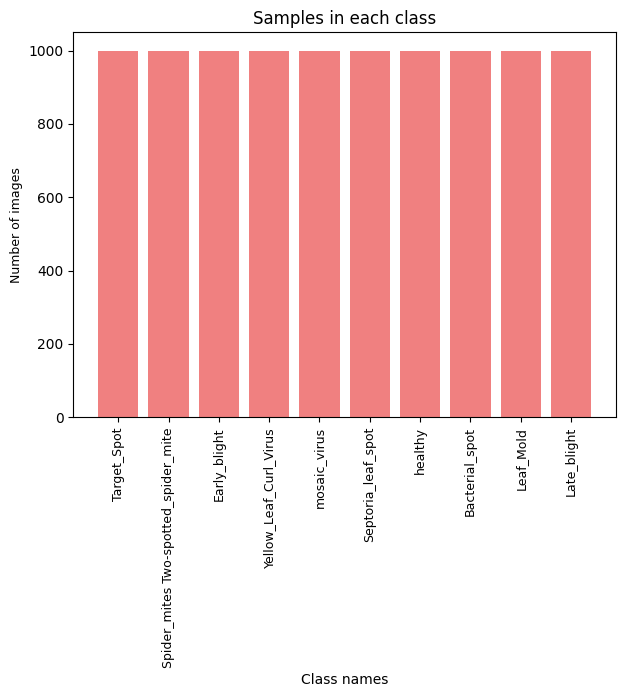

In [7]:
# Visulaizing it
plt.figure(figsize=(7, 5))
plt.bar(class_names, samples[1:], color='lightcoral')
plt.title('Samples in each class')
plt.xlabel('Class names')
plt.ylabel('Number of images', fontsize=9)
plt.xticks(rotation=90, fontsize=9);

In [8]:
def plot_random_img(target_folder, class_names=class_names):
  '''
  Plots 25 random images of random classes.
  Args:
    target_folder: Folder path.
    class_name: Name of the classes.
  '''
  plt.figure(figsize=(20, 12))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    random_class=random.choice(class_names)
    filepath=target_folder+random_class
    random_img=random.sample(os.listdir(filepath), 1)
    img=mpimg.imread(filepath + '/' + random_img[0])
    plt.imshow(img)
    plt.title(random_class, fontsize=10)
    plt.axis(False)

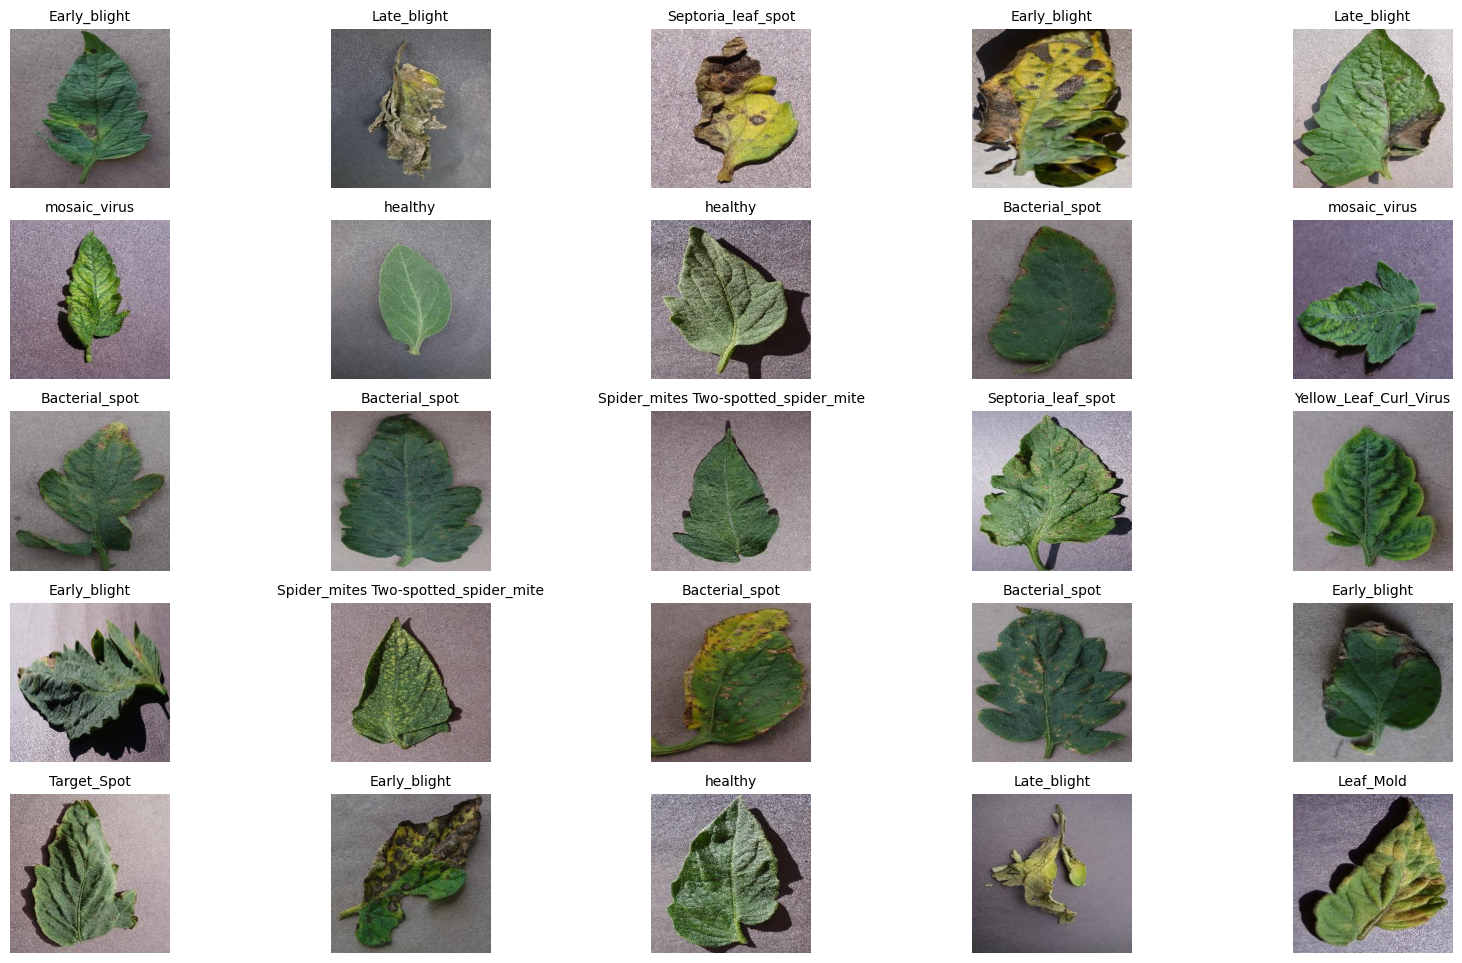

In [9]:
plot_random_img(target_folder='data/Train/')

## Helper functions

In [10]:
def plot_loss_curves(history):
  '''
  Plots the model train and validation loss curves during training.
  '''
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))
  fig, ax=plt.subplots(1, 2, figsize=(13, 4))
  # loss plot
  ax[0].plot(epochs, loss, label='train loss')
  ax[0].plot(epochs, val_loss, label='val loss')
  ax[0].set(title='Sparse categorical loss', xlabel='epochs', ylabel='loss')
  ax[0].legend()
  # Accuracy plot
  ax[1].plot(epochs, acc, label='train accuracy')
  ax[1].plot(epochs, val_acc, label='val accuracy')
  ax[1].set(title='Accuracy plot', xlabel='epochs', ylabel='accuracy')
  ax[1].legend()

In [26]:
def combine_histories(org_hist, new_hist):
  '''
  Combines the histories of training and after fine tuning model
  and plots them.
  '''
  acc=org_hist.history['accuracy']
  val_acc=org_hist.history['val_accuracy']
  loss=org_hist.history['loss']
  val_loss=org_hist.history['val_loss']
  # Combining org history
  total_acc=acc+new_hist.history['accuracy']
  total_val_acc=val_acc+new_hist.history['val_accuracy']
  total_loss=loss+new_hist.history['loss']
  total_val_loss=val_loss+new_hist.history['val_loss']
  fig, ax=plt.subplots(1, 2, figsize=(13, 4))
  # Plotting accuracy
  ax[0].plot(total_acc, label='train accuracy')
  ax[0].plot(total_val_acc, label='val accuracy')
  ax[0].set(title='Accuracy plot', xlabel='epochs', ylabel='accuracy')
  plt.legend(loc='lower right')
  # Plotting loss
  ax[1].plot(total_loss, label='train loss')
  ax[1].plot(total_val_loss, label='val loss')
  ax[1].set(title='Sparse categorical crossentropy loss',
            xlabel='epochs', ylabel='loss')
  plt.legend()

In [12]:
def scores(y_true, y_preds):
  '''
  Returns the score of the model like: Accuracy, f1_score etc.
  '''
  score_dict={'Accuracy': accuracy_score(y_true, y_preds),
              'Recall': recall_score(y_true, y_preds, average='macro'),
              'Precision': precision_score(y_true, y_preds, average='macro'),
              'f1': f1_score(y_true, y_preds, average='macro') }
  return score_dict

In [13]:
def make_confusion_matrix(y_true, y_pred, classes=None):
  '''
  Creates the confusion matrix and visualize it using seaborn.
  Args:
    y_true: True labels
    y_preds:Labels predicted by the model.
    classes: Name of the classes.
  '''
  cm = confusion_matrix(y_true, y_pred)
  # Normalize confusion matrix
  cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  # Normalize confusion matrix column-wise
  cm=cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
  plt.figure(figsize=(10, 10))
  cmap=sns.color_palette("light:b", as_cmap=True)
  sns.heatmap(cm, annot=True, fmt=".2%",
              square=True, cmap=cmap, cbar=False,
              xticklabels=classes, yticklabels=classes)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix', size=15)

## Pre-processing and importing the data

In [14]:
# Directory paths
train_dir='data/Train/'
test_dir='data/val/'

In [15]:
IMG_SIZE=(128, 128)
BATCH_SIZE=32
# Importing the data and turning it into batches
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='int',
                                                               color_mode='rgb',
                                                               batch_size=BATCH_SIZE,
                                                               shuffle=True)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='int',
                                                              color_mode='rgb',
                                                              batch_size=BATCH_SIZE,
                                                              shuffle=False)

Found 10000 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.


## Model building

In [16]:
# Turning on mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

`mixed_precision` uses both 16-bit and 32-bit floating point numbers in a model during training to make it run faster and use less memory. The model will take less time in training.

In [17]:
# Creating the model
base_model=tf.keras.applications.EfficientNetV2B3(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(128, 128, 3), name='input_layer')
x=base_model(inputs, training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_avg_layer')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(10,
                              activation='softmax',
                              name='output_layer')(x)

model=tf.keras.Model(inputs, outputs)

52606240/52606240 [==============================] - 0s 0us/step


The `Rescaling` layer is built in the `EfficientNetBx` models. So, there's no need to turn the number between 0 to 1.

In [18]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b3 (Functio  (None, None, None, 1536   12930622  
 nal)                        )                                   
                                                                 
 global_avg_layer (GlobalAv  (None, 1536)              0         
 eragePooling2D)                                                 
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 output_layer (Dense)        (None, 10)                5130  

In [20]:
ckpt_path='model_ckpt'
# Setting up early stopping, lr scheduling and checkpoint callbacks
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=5,
                                                restore_best_weights=True,
                                                verbose=False)
lr_scheduler=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  patience=3,
                                                  factor=0.2,
                                                  min_lr=0.00001,
                                                  verbose=False)
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                    save_best_only=True,
                                                    verbose=False,
                                                    monitor='val_loss',
                                                    save_weights_only=True)

In [21]:
initial_epochs=5
# Fitting the model
history=model.fit(train_data,
                  epochs=initial_epochs,
                  validation_data=test_data)

Epoch 1/5
313/313 [==============================] - 33s 53ms/step - loss: 0.6457 - accuracy: 0.7856 - val_loss: 0.5313 - val_accuracy: 0.8203
Epoch 2/5
313/313 [==============================] - 14s 44ms/step - loss: 0.2914 - accuracy: 0.9027 - val_loss: 0.4728 - val_accuracy: 0.8414
Epoch 3/5
313/313 [==============================] - 14s 44ms/step - loss: 0.2136 - accuracy: 0.9300 - val_loss: 0.3898 - val_accuracy: 0.8698
Epoch 4/5
313/313 [==============================] - 14s 45ms/step - loss: 0.1678 - accuracy: 0.9451 - val_loss: 0.3659 - val_accuracy: 0.8872
Epoch 5/5
313/313 [==============================] - 18s 56ms/step - loss: 0.1313 - accuracy: 0.9571 - val_loss: 0.4051 - val_accuracy: 0.8694


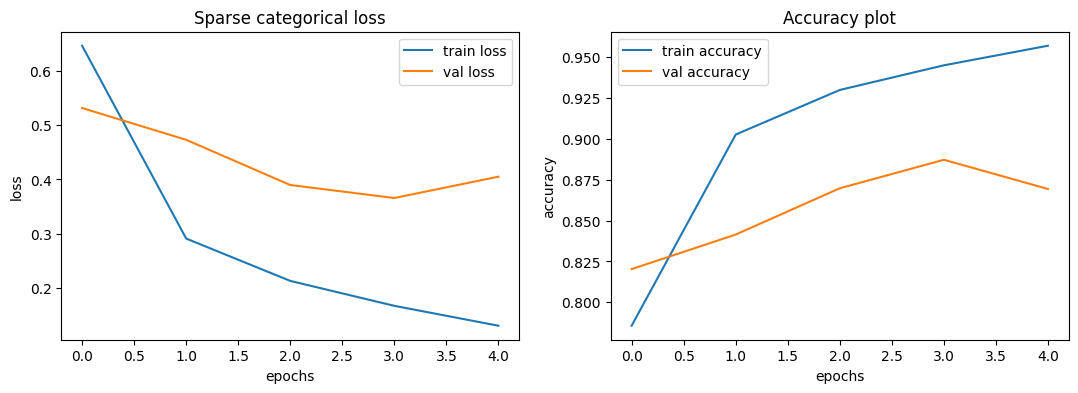

In [22]:
plot_loss_curves(history)

## Fine tuning

To fine tune the model we can unfreeze the layers in the model we'll try to unfreeze the 25% of the layers in the model and further more we'll add the callbacks like: `EarlyStopping`, `ModelCheckpoint` and `ReduceLROnPlateau` callback.
* **Early stopping callback**: Stops the model training when the model stops improving.
* **Model checkpoint callback**: Saves the model weights at some epochs.
* **Reduce LR on plateau callback**: Reduce the learning rate of the model by some factor when it stops improving.

In [23]:
# Unfreezing all the layers
base_model.trainable=True
# Unfreezing 20% of the layers
total_layers=len(model.layers)
trainable_layers=int(0.8 * total_layers)
for layer in base_model.layers[trainable_layers:]:
  layer.trainable=False

In [24]:
# Recompiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
epochs=initial_epochs+25
# Fitting the model
fine_history=model.fit(train_data,
                       epochs=epochs,
                       initial_epoch=initial_epochs,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[early_stopping,
                                  lr_scheduler, model_checkpoint])

Epoch 6/30
313/313 [==============================] - 43s 95ms/step - loss: 0.0742 - accuracy: 0.9776 - val_loss: 0.3558 - val_accuracy: 0.8977 - lr: 1.0000e-04
Epoch 7/30
313/313 [==============================] - 25s 79ms/step - loss: 0.0630 - accuracy: 0.9818 - val_loss: 0.3309 - val_accuracy: 0.9045 - lr: 1.0000e-04
Epoch 8/30
313/313 [==============================] - 26s 83ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.3351 - val_accuracy: 0.9043 - lr: 1.0000e-04
Epoch 9/30
313/313 [==============================] - 24s 77ms/step - loss: 0.0483 - accuracy: 0.9876 - val_loss: 0.3345 - val_accuracy: 0.9038 - lr: 1.0000e-04
Epoch 10/30
313/313 [==============================] - 26s 84ms/step - loss: 0.0443 - accuracy: 0.9885 - val_loss: 0.3288 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 11/30
313/313 [==============================] - 26s 81ms/step - loss: 0.0422 - accuracy: 0.9902 - val_loss: 0.3299 - val_accuracy: 0.9073 - lr: 1.0000e-04
Epoch 12/30
313/313 [===========

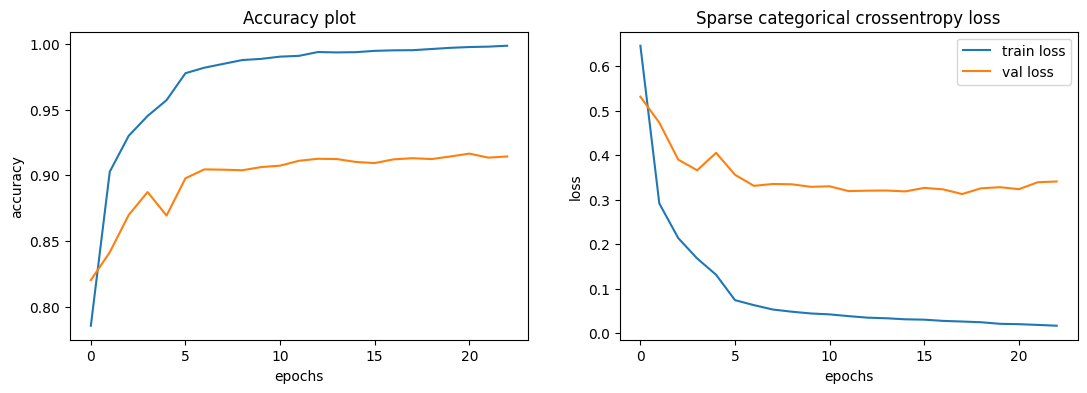

In [27]:
# Plotting the loss curves
combine_histories(history, fine_history)

In [28]:
loss, accuracy=model.evaluate(test_data, verbose=False)
print(f'Loss on test set is {loss} and the accuracy is {accuracy*100:.2f}%.')

Loss on test set is 0.3125435709953308 and the accuracy is 91.30%.


Total accuracy on test set is 0.31 and the loss is 91.3%. Now let's make predictions on the test set.

In [29]:
# Making predictions
pred_probs=model.predict(test_data)

144/144 [==============================] - 6s 26ms/step


In [30]:
# Turning the probabilities into the labels
preds=np.argmax(pred_probs, axis=1)
preds[:5]

array([0, 0, 0, 0, 0])

In [31]:
# Getting all the labels of test set
labels=[]
for img, label in test_data.unbatch():
  labels.append(label.numpy())
labels[:5]

[0, 0, 0, 0, 0]

In [32]:
# Getting the scores
scores(labels, preds)

{'Accuracy': 0.9129770992366413,
 'Recall': 0.9123809739244273,
 'Precision': 0.9157838778278318,
 'f1': 0.9127431601523661}

In [33]:
# Getting the class_names
class_names=test_data.class_names

In [34]:
# Confusion matrix
print(confusion_matrix(labels, preds))

[[416   4   0   0   1   0   3   1   0   0]
 [  0 426  45   3   0   0   1   0   0   5]
 [  0   5 450   3   2   0   2   0   1   0]
 [  0  10   1 446   0   0   1   1   0  11]
 [  1  13  12  12 383   1   4   0   0  10]
 [  0   8   1  12   1 361  15   9   2  26]
 [  0  22   9   2  14   8 393   0   2   7]
 [  1   0   0   0   0   3   1 484   0   1]
 [  2   6  15   3   3   3  14   1 427   7]
 [  0   0   1   1  43   0   3   0   0 400]]


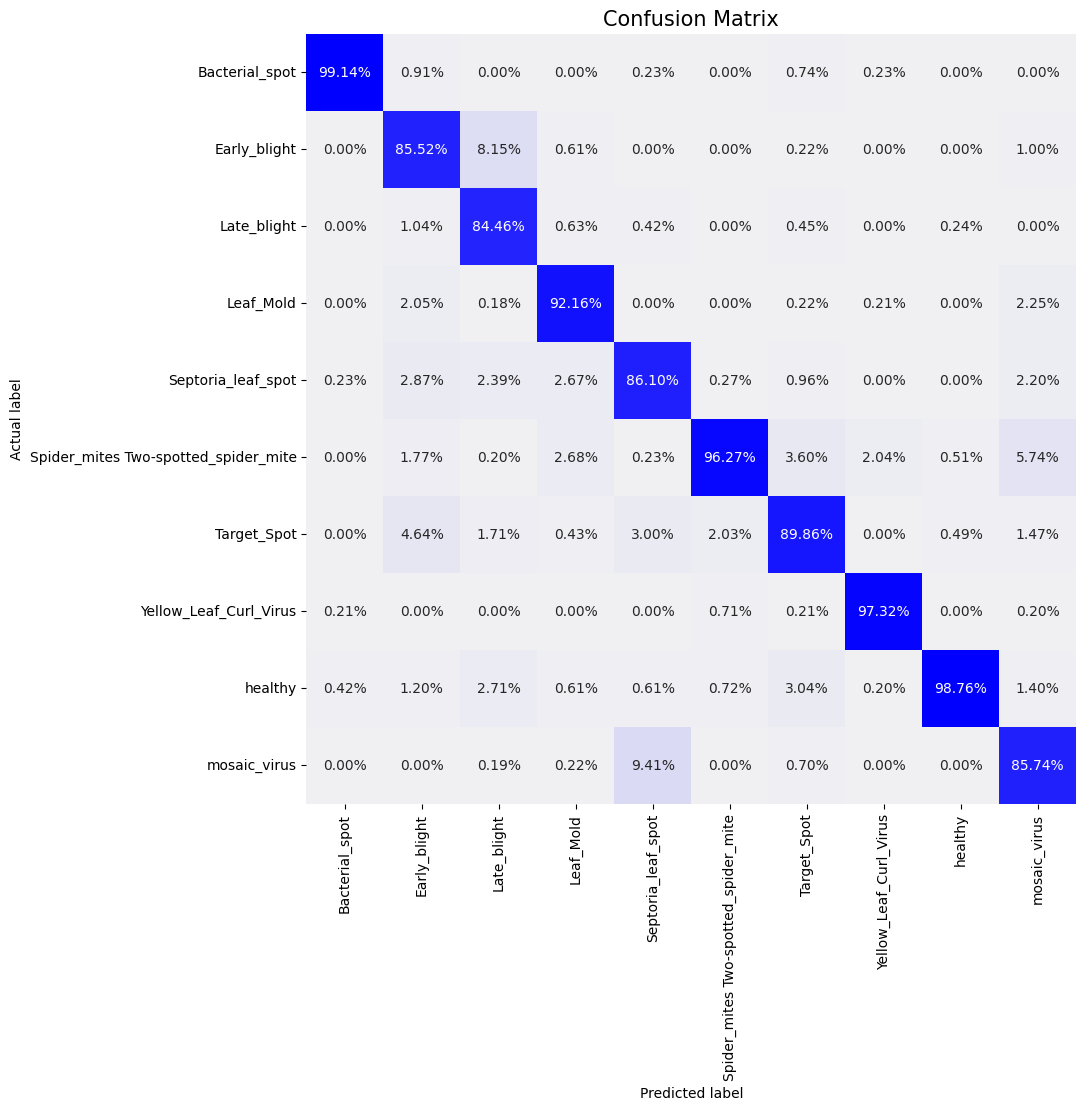

In [35]:
# Visualizing the confusion matrix
make_confusion_matrix(labels, preds, class_names)

## Saving the model

In [36]:
model.save('tomato.keras')